In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
!rm -f housing.csv
!wget https://archive.ics.uci.edu/ml/datasets/Housing -O housing.csv

--2018-01-29 00:58:42--  https://archive.ics.uci.edu/ml/datasets/Housing
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4106 (4.0K) [text/html]
Saving to: ‘housing.csv’

100%[======================================>] 4,106       --.-K/s   in 0s      

2018-01-29 00:58:42 (119 MB/s) - ‘housing.csv’ saved [4106/4106]



In [34]:
    # Load dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
#dataset = read_csv(filename, delim_whitespace=True, names=names)
# since the data is nolonger avl at the said addres
from sklearn.datasets import load_boston
import pandas as pd
dataset_bunch = load_boston()

In [35]:
type(dataset_bunch)

sklearn.utils.Bunch

In [36]:
dataset_bunch.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [37]:
dataset_bunch.data.shape

(506, 13)

1. CRIM: per capita crime rate by town  
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
3. INDUS: proportion of non-retail business acres per town  
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
5. NOX: nitric oxides concentration (parts per 10 million)  
6. RM: average number of rooms per dwelling  
7. AGE: proportion of owner-occupied units built prior to 1940  
8. DIS: weighted distances to five Boston employment centers  
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10000 dollars
11. PTRATIO: pupil-teacher ratio by town  
12. B: 1000(Bk 􀀀 0:63)2 where Bk is the proportion of blacks by town  
13. LSTAT: % lower status of the population  
14. MEDV: Median value of owner-occupied homes in $1000s  

In [38]:
dataset = pd.DataFrame(dataset_bunch.data)

In [39]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [40]:
dataset.columns = dataset_bunch.feature_names

In [41]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [42]:
# the Mdev is missing.. not sure why.. 

In [44]:
set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4
75%,3.6e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0


In [45]:
set_option('precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54


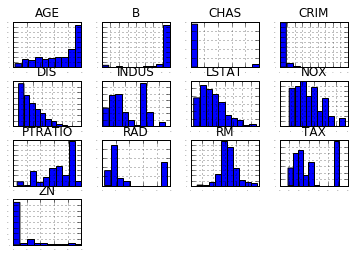

In [46]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

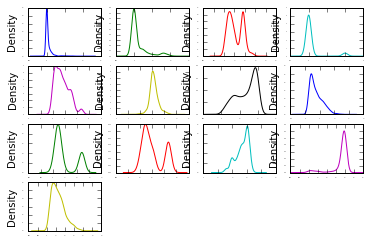

In [47]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

In [48]:
# desity had some issues in python 3.. 

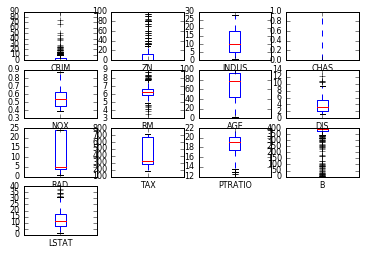

In [50]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
pyplot.show()

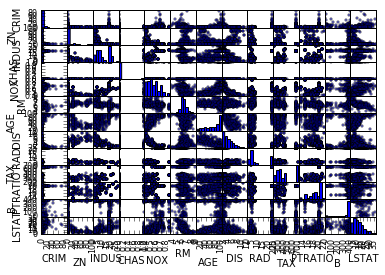

In [54]:

scatter_matrix(dataset)
pyplot.show()

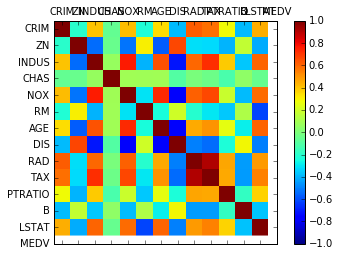

In [52]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax) # find what makes this tick
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [53]:
type(fig)

matplotlib.figure.Figure

Feature selection and removing the most correlated attributes.  
Normalizing the dataset to reduce the effect of differing scales.  
Standardizing the dataset to reduce the effects of differing distributions.

In [56]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:12] # the mdev is missing
Y = array[:,12]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [57]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [58]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [59]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -17.583175 (7.643926)
LASSO: -19.639585 (7.894186)
EN: -21.641972 (8.612739)
KNN: -27.861538 (8.406556)
CART: -23.095470 (4.060302)
SVR: -51.536924 (11.073775)


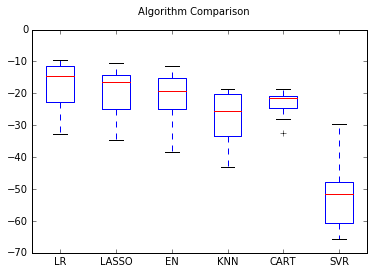

In [60]:
    # Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [69]:
# Standardize the dataset
pipelines = []
#Using pipeline... 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

resultScaled = []
names = []


for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    resultScaled.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -17.583175 (7.643926)
ScaledLASSO: -19.502810 (6.884157)
ScaledEN: -20.322858 (7.463712)
ScaledKNN: -18.054251 (7.508327)
ScaledCART: -23.721416 (4.741457)
ScaledSVR: -19.339011 (7.202939)


In [62]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -17.583175 (7.643926)
LASSO: -19.639585 (7.894186)
EN: -21.641972 (8.612739)
KNN: -27.861538 (8.406556)
CART: -22.547085 (4.882896)
SVR: -51.536924 (11.073775)


In [63]:
# Good difference

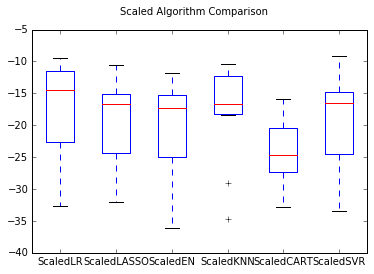

In [67]:
# Compare SCALED Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(resultScaled)
ax.set_xticklabels(names)
pyplot.show()

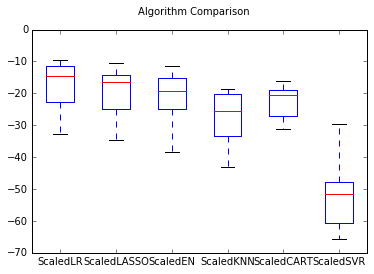

In [68]:
# Compare Algorithms    # the original
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [70]:
# Scaled KNN wins.. has a tighter distribution than scaled LR

In [71]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Grid search algorithm

In [73]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.005548 using {'n_neighbors': 5}
-21.988182 (8.479841) with: {'n_neighbors': 1}
-18.695139 (6.352790) with: {'n_neighbors': 3}
-18.005548 (7.439786) with: {'n_neighbors': 5}
-18.590785 (7.703297) with: {'n_neighbors': 7}
-18.832627 (8.401041) with: {'n_neighbors': 9}
-18.941717 (8.229943) with: {'n_neighbors': 11}
-19.421293 (8.070947) with: {'n_neighbors': 13}
-20.065616 (8.124442) with: {'n_neighbors': 15}
-20.406387 (8.088518) with: {'n_neighbors': 17}
-20.385850 (7.607598) with: {'n_neighbors': 19}
-20.547727 (7.732454) with: {'n_neighbors': 21}


In [74]:
# so thats paramenter tuning for performance inprovement..

# next up performance tuning using.. ensemble methods..

In [77]:
# ensembles
ensembles = [] # placeholder array for looping
ensembles.append(('Scaled AB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('Scaled GBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('Scaled RF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('Scaled ET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled AB: -16.022138 (5.836076)
Scaled GBM: -13.032856 (4.087253)
Scaled RF: -13.948734 (4.597749)
Scaled ET: -14.228332 (5.195557)


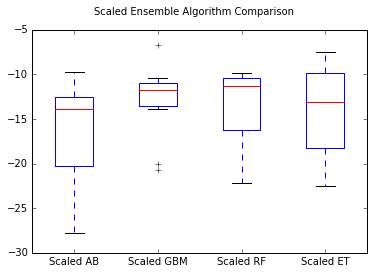

In [78]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [79]:
# pick scaled GBM... because.. lowest error.. and tight distribution of error scores.
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -12.530511 using {'n_estimators': 200}
-13.409998 (3.811558) with: {'n_estimators': 50}
-12.895915 (3.779058) with: {'n_estimators': 100}
-12.555160 (3.767826) with: {'n_estimators': 150}
-12.530511 (3.679237) with: {'n_estimators': 200}
-12.703910 (3.773854) with: {'n_estimators': 250}
-12.775644 (3.847394) with: {'n_estimators': 300}
-12.885498 (3.941511) with: {'n_estimators': 350}
-13.031574 (4.058015) with: {'n_estimators': 400}


In [81]:
# and thusly we finalise the model..
# scaled GBM

# prepare the model
# on the entire data set
scaler = StandardScaler().fit(X_train) # because thats what gives better results..
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

23.7483645762


In [83]:
Y_validation.shape

(102,)

In [84]:
X_validation.shape

(102, 12)

In [85]:
#gap is due to the missing variable..?